# SI 370 FA 2018: Mid-term Test

### Please turn in HTML and notebook file on canvas by 10:30am.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


This test has 7 questions and is worth 150 points.  You may use any online or paper-based resources *except* real-time, direct communication with other people (i.e. instant messaging).

## Question 1 (Basic pandas, 15 points)):
### 1a: Write code to create the following DataFrame:
![](resources/midterm-dataframe1.png)

In [4]:
#Insert Code Here
index_name = ['alpha', 'bravo', 'charlie', 'delta']
data = {'score': [76, 81, 67, 90], 'odds': [0.8, 0.9, 0.7, 1.0]}
df = pd.DataFrame(data, index=index_name)
df

,score,odds
alpha,76,0.8
bravo,81,0.9
charlie,67,0.7
delta,90,1.0


### 1b: Write code to use a universal function to transform the DataFrame you created in 1a to the following DataFrame:

![](resources/midterm-dataframe2.png)

In [8]:
#Insert Code Here
df['prob'] = 1 - df['odds']
df

,score,odds,prob
alpha,76,0.8,0.2
bravo,81,0.9,0.1
charlie,67,0.7,0.3
delta,90,1.0,0.0


## Question 2 (Pandas and code flow, 15 points):
Put the following 5 code blocks in the correct order so the output is 
```
2     1075000.0
6     1762000.0
13     774294.0
Name: current_salary_cleaned, dtype: float64
```



In [ ]:
# nfl_football_players_salaries = nfl_football_players.dropna(subset=['current_salary_cleaned'])

In [ ]:
# nfl_football_players['current_salary_cleaned'] = nfl_football_players['current_salary_nocommas'].astype(float)

In [ ]:
# nfl_football_players = pd.read_json('data/nfl_football_profiles.json')

In [ ]:
# nfl_football_players_salaries['current_salary_cleaned'].head(3)

In [ ]:
# nfl_football_players['current_salary_nocommas'] = nfl_football_players['current_salary'].str.replace(',', '')

In [9]:
nfl_football_players = pd.read_json('data/nfl_football_profiles.json')
nfl_football_players['current_salary_nocommas'] = nfl_football_players['current_salary'].str.replace(',', '')
nfl_football_players['current_salary_cleaned'] = nfl_football_players['current_salary_nocommas'].astype(float)
nfl_football_players_salaries = nfl_football_players.dropna(subset=['current_salary_cleaned'])
nfl_football_players_salaries['current_salary_cleaned'].head(3)

2     1075000.0
6     1762000.0
13     774294.0
Name: current_salary_cleaned, dtype: float64

## Question 3 (Visualization and Analysis, 20 points): 

Recall the wine quality data dataset that we used in this class.  In the code below, we load the data and then
separate it into "good" (i.e. quality > 6) and "bad" (i.e. quality <= 5) categories.

In [10]:
wine = pd.read_csv('data/winequality-red.csv')

In [11]:
wine['good_or_bad'] = np.where(wine['quality'] > 6, 'good','bad')

### 3a. Create a boxplot that shows the values of pH for good and bad wines.  
Based on your visualization, does it look like there is a significant difference of the pH between good and bad wines?

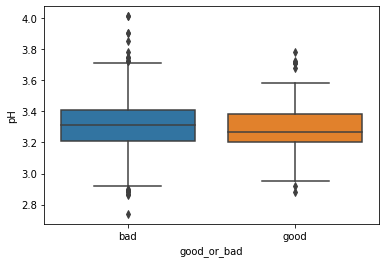

In [13]:
#Insert Code Here
sns.boxplot('good_or_bad', y='pH', data=wine)

There does not seem to be a significant difference with these two box plots. The medians and IQR are very similar.

Examine the results of a t-test on pH for good and bad wines using the following code. 

In [15]:
from scipy.stats import ttest_ind
goodwine = wine[wine['good_or_bad'] == 'good']
badwine = wine[wine['good_or_bad'] == 'bad']
results = ttest_ind(goodwine['pH'],badwine['pH'])

In [16]:
results.pvalue

0.02198034398691512

### 3b.  Based on your t-test, is the difference between good and bad wines significant?

No, because it is below 0.05. This means that we would accept the null hypothesis, and say that the two groups are not significantly different.

## Question 4 (Correlation & Regression, 20 points):

This question also uses the wine quality dataset.

In [17]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_or_bad'],
      dtype='object')

### 4a. Fill in the correct formula to create two regressions of pH vs. "total sulfur dioxide", one for "good" wines and one for "bad" wines (code for the regression is given to you below. 

In [24]:
formula = "pH ~ Q('total sulfur dioxide')"

In [25]:
model0 = smf.ols(formula, data=goodwine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5329
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.466
Time:                        14:00:31   Log-Likelihood:                 98.152
No. Observations:                 217   AIC:                            -192.3
Df Residuals:                     215   BIC:                            -185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.2806      0.015    212.989      0.000       3.250       3.311
Q('total sulfur dioxide')     0.0002      0.000      0.730      0.466      -0.000       0.001
==============================================================================
Omnibus:                        6.927   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.539
Skew:                           0.301   Prob(JB):                       0.0231
Kurtosis:                       3.687   Cond. No.                         70.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model0 = smf.ols(formula, data=badwine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     12.55
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           0.000409
Time:                        14:00:34   Log-Likelihood:                 630.02
No. Observations:                1382   AIC:                            -1256.
Df Residuals:                    1380   BIC:                            -1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.3363      0.007    451.889      0.000       3.322       3.351
Q('total sulfur dioxide')    -0.0004      0.000     -3.543      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       30.928   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.067
Skew:                           0.167   Prob(JB):                     3.00e-12
Kurtosis:                       3.900   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4b. How do the results of the two regressions differ?

The coefficients and intercepts don't look that different, the p value for total sulfur dioxide of the bad wine is higher.

The coef stuff is the most important. For the good wine, our estimate for pH is the coef of the sulfer dioxide (0.02) * the intercept (3.2806)

the r squared value shows how much of the variance is explained by the model (if it's low, not a lot, if it's high, a lot) r squared is the percentage of the variance that's explained by the model, if r squared is < 0.6 it's not great

prob of f stat tells if regression is significant or not, this one is not for good wine, depends on num of observations you have, if less than 0.05 it's significant??

## Question 5 (Categorical variables, 20 points):

The dataset contains details about a list of comic book characters from DC and Marvel, such as:  sex and sexuality, hair color, eye color, whether the characters were good guys or bad guys or neutral, whether they had secret identities, and whether they were alive or dead.

In [27]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


In [28]:
comic_characters = comic_characters[(comic_characters['Identity']== 'Secret Identity') | (comic_characters['Identity'] == 'Public Identity')]

### 5a. Create a crosstab of Identity vs. alive status

In [29]:
#Insert Code Here
ct = pd.crosstab(comic_characters.Identity, comic_characters.alive)
ct

alive,Deceased Characters,Living Characters
Identity,,
Public Identity,1683,5309
Secret Identity,2248,6435


### 5b. Create a mosaic plot of identity vs alive status

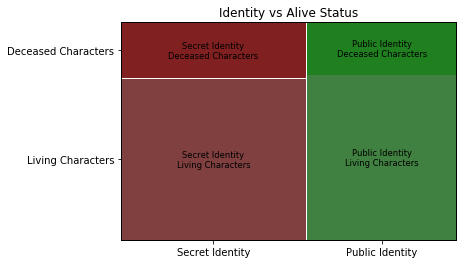

In [31]:
#Insert Code Here
t = mosaic(comic_characters,  ['Identity', 'alive'], title='Identity vs Alive Status')

## Question 6 (Machine Learning: Clustering, 20 points):

For clustering, it's sometimes helpful to create dummy variables.  For example, the "Identity" property can be replaced by Identity_Public Identity and Indentity_Secret Identity.  The following code does that for several of the categorical variables in the comic characters dataset:

In [32]:
comic_dummies = pd.get_dummies(comic_characters,columns=['Identity','align','eye','hair','sex','alive'])


In [33]:
comic_dummies.head()

,publisher,name,appearances,first_appearance,month,year,date,Identity_Public Identity,Identity_Secret Identity,align_Bad Characters,...,hair_Violet Hair,hair_White Hair,hair_Yellow Hair,sex_Agender Characters,sex_Female Characters,sex_Genderfluid Characters,sex_Genderless Characters,sex_Male Characters,alive_Deceased Characters,alive_Living Characters
id,,,,,,,,,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),4043.0,"1962, August",August,1962.0,8/1/1962,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,Marvel,Captain America (Steven Rogers),3360.0,"1941, March",March,1941.0,3/1/1941,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3,Marvel,"Wolverine (James \""Logan\"" Howlett)",3061.0,"1974, October",October,1974.0,10/1/1974,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",2961.0,"1963, March",March,1963.0,3/1/1963,1,0,0,...,0,0,0,0,0,0,0,1,0,1
6,Marvel,Benjamin Grimm (Earth-616),2255.0,"1961, November",November,1961.0,11/1/1961,1,0,0,...,0,0,0,0,0,0,0,1,0,1


The following code creates a new DataFrame with only the resulting dummy variables:

In [34]:
comic_dummies_vars = comic_dummies.iloc[:,7:]

## Question 6: Find the optimal value of "k" for k-means clustering of the comic character dataset with dummy variables (i.e. comic_dummies_vars).

In [36]:
#Insert Code Here

# HE'S NOT GOING TO ASK US THIS QUESTION ON THE EXAM!

# he might pre-run this for us and ask us which solution is best, know how to interpret a 
# sillhouette scores and clusters (tightness, closeness, etc.)

# he might ask us to perform a k means analysis with a specific k

# tell me who in the dataset is most like someone else (the diagram with the arrows?)

## Question 7 (Natural Language Processing, 20 points):

The data/vox_transcript.csv file that we distributed as part of this test contains a transcript of the first 2016 Presidential Debate between Clinton and Trump.  

Run the following code block to load and peek at the data:

In [46]:
# HE'S NOT GONNA ASK US ABOUT SPACY, HE WILL ASK ABOUT NLTK, HE WILL USE THIS DATASET

# HE COULD ASK WHAT EVIDENCE WE HAVE THAT ONE SPEAKER HAD MORE NEGATIVE SENTENCES
# HE WILL ASK US TO TIE THAT BACK TO AN ANOVE OR A T TEST??

# mean sentiment from each side, he'd give code, we'd have to clean, stem, lemm

# go through nlp work we did and see what you can answer below!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# might ask us to do a classification example, classification on nlp text

In [40]:
debate = pd.read_csv('data/vox_transcript.csv')
debate.head()

,text_id,question_id,speaker,text,text_type
0,1,1,Holt,Good evening from Hofstra University in Hempst...,q
1,2,1,Holt,The participants tonight are Donald Trump and ...,q
2,3,1,Holt,The 90-minute debate is divided into six segme...,q
3,4,1,Holt,The questions are mine and have not been share...,q
4,5,1,Holt,"I will invite you to applaud, however, at this...",q


In [44]:
debate.shape

(519, 5)

In [45]:
from collections import Counter

In [42]:
import spacy
nlp = spacy.load('en')

ModuleNotFoundError: No module named 'spacy'

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

Let's split the data so we have one DataFrame for Trump and one DataFrame for Clinton

In [ ]:
trump = debate[debate['speaker'] == 'Trump']
clinton = debate[debate['speaker'] == 'Clinton']

The following code concatenates all the text from each of those dataframes into strings (one for each of Trump and Clinton):

In [ ]:
trump_debate_text = trump['text'].str.cat(sep = ' ')
clinton_debate_text = clinton['text'].str.cat(sep = ' ')

In [ ]:
doc = nlp(trump_debate_text)

In [ ]:
labels = [x.pos_ for x in doc if x.text not in STOP_WORDS]
#Counter(labels)

In [ ]:
plt.figure(figsize=(45,10))
sns.countplot(labels, order=pd.Series(labels).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

### 7a. Repeat the above steps on the Clinton text:

In [ ]:
#Insert Code Here

### 7b. Describe how these distributions differ.

Insert your interpretation here.

### Please turn in HTML and notebook file on canvas by 10:30am.